# Problem Statement:

Forest land is highly required for developing ecosystem management. Any changes that
occur in ecosystem should be carefully noticed to avoid further loss. This model is
helpful in noticing the changes occurred due to heavy floods or any other calamities
which affected the forest land.
The goal is to predict seven different cover types in four different wilderness areas of
the Roosevelt National Forest of Northern Colorado with the best accuracy

# Import Required Libraries:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from pandas_profiling import ProfileReport


warnings.filterwarnings("ignore")
%matplotlib inline

## Reading the data:

In [3]:
train = pd.read_csv("train.csv",index_col = "Id")

### Checking whether dataset is balanced or not:

In [4]:
train["Cover_Type"].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

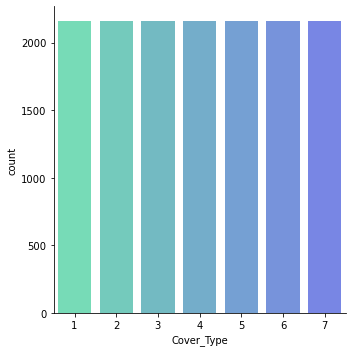

In [5]:
sns.catplot(data=train, x="Cover_Type", kind="count", palette="winter_r", alpha=.6)


**We can see in above plot that all the categorical values are in equal proportion in the target column of the dataset.So we can say that dataset is a balanced dataset.**

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [27]:
train.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Info about the dataset:

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:</br>

1 - Spruce/Fir</br>
2 - Lodgepole Pine</br>
3 - Ponderosa Pine</br>
4 - Cottonwood/Willow</br>
5 - Aspen</br>
6 - Douglas-fir</br>
7 - Krummholz</br>

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).</br>

Data Fields</br>
Elevation - Elevation in meters</br>
Aspect - Aspect in degrees azimuth</br>
Slope - Slope in degrees</br>
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features</br>
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features</br>
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway</br>
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice</br>
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice</br>
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice</br>
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points</br>
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation</br>
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation</br>
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation</br>

The wilderness areas are:</br>

1 - Rawah Wilderness Area</br>
2 - Neota Wilderness Area</br>
3 - Comanche Peak Wilderness Area</br>
4 - Cache la Poudre Wilderness Area</br>

The soil types are:</br>

1 Cathedral family - Rock outcrop complex, extremely stony.</br>
2 Vanet - Ratake families complex, very stony.</br>
3 Haploborolis - Rock outcrop complex, rubbly.</br>
4 Ratake family - Rock outcrop complex, rubbly.</br>
5 Vanet family - Rock outcrop complex complex, rubbly.</br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.</br>
7 Gothic family.</br>
8 Supervisor - Limber families complex.</br>
9 Troutville family, very stony.</br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.</br>
11 Bullwark - Catamount families - Rock land complex, rubbly.</br>
12 Legault family - Rock land complex, stony.</br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.</br>
14 Pachic Argiborolis - Aquolis complex.</br>
15 unspecified in the USFS Soil and ELU Survey.</br>
16 Cryaquolis - Cryoborolis complex.</br>
17 Gateview family - Cryaquolis complex.</br>
18 Rogert family, very stony.</br>
19 Typic Cryaquolis - Borohemists complex.</br>
20 Typic Cryaquepts - Typic Cryaquolls complex.</br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.</br>
22 Leighcan family, till substratum, extremely bouldery.</br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.</br>
24 Leighcan family, extremely stony.</br>
25 Leighcan family, warm, extremely stony.</br>
26 Granile - Catamount families complex, very stony.</br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.</br>
28 Leighcan family - Rock outcrop complex, extremely stony.</br>
29 Como - Legault families complex, extremely stony.</br>
30 Como family - Rock land - Legault family complex, extremely stony.</br>
31 Leighcan - Catamount families complex, extremely stony.</br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.</br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.</br>
34 Cryorthents - Rock land complex, extremely stony.</br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.</br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.</br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.</br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.</br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.</br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.</br>

## Preparing  EDA report of the dataset:

In [29]:
profile = ProfileReport(train, explorative=True)

#Saving results to a HTML file
profile.to_file("forest_cover_EDA.html")

## Model Training and Evaluation:

### Defining x and y:

In [4]:
x = train.drop("Cover_Type", axis =1  )

In [5]:
y = train["Cover_Type"]

In [6]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted,average = 'micro') # Calculate F1-score
    precision = precision_score(true, predicted,average = 'micro') # Calculate Precision
    recall = recall_score(true, predicted,average = 'micro')  # Calculate Recall
  
    return acc, f1 , precision, recall

In [7]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train,y_train,X_test,y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision, model_train_recall=evaluate_clf(y_train ,y_train_pred)
        


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,model_test_recall=evaluate_clf(y_test, y_test_pred)
      

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
   
        

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
     
       
        print('='*35)
        print('\n')
        
    
        
    

### Splitting the dataset:

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.values, train_size=0.80, random_state=42)


### Normalizing the data:

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

In [16]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose = False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GaussianNB Classifier" : GaussianNB()
    
    
}

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(ytrain)
y_test = le.transform(ytest)

In [17]:
evaluate_models(x_train_scaled, ytrain,x_test_scaled, ytest, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8674
- F1 score: 0.8674
- Precision: 0.8674
- Recall: 0.8674


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7917
- F1 score: 0.7917
- Precision: 0.7917
- Recall: 0.7917


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8417
- F1 score: 0.8417
- Precision: 0.8417
- Recall: 0.8417
----------------------------------
Model performance for Test set
- Accuracy: 0.8022
- F1 score: 0.8022
- Precision: 0.8022
- Recall: 0.8022


Logistic Regression
Model performance for Training set
- Accuracy: 0.7124
- F1 score: 0.7124
- Precision: 0.7124
- Recall: 0.7124
----------------------------------
Model performance for Test set

### Random Forest Hyperparameter tuning

**Random Forest best parameters values:
  max_depth': None, 
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 120**

In [39]:
rf_model = {"RandomForest" : RandomForestClassifier(n_estimators = 120, max_depth = None, max_features = 0.6, max_samples = 1.0)}

In [40]:
evaluate_models(x_train_scaled, y_train,x_test_scaled, y_test, rf_model)

RandomForest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8694
- F1 score: 0.8694
- Precision: 0.8694
- Recall: 0.8694




### Hyperparameter Tuning of XGBoost

**Best parameters for xgboost:
{'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.5}**

In [41]:
rf_xgboost = {"xgboost" : XGBClassifier(min_child_weight = 7, max_depth = 15, learning_rate = 0.3, gamma= 0.0, colsample_bytree= 0.5)}
evaluate_models(x_train_scaled, y_train,x_test_scaled, y_test, rf_xgboost)

xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8750
- F1 score: 0.8750
- Precision: 0.8750
- Recall: 0.8750




### CatBoost hyperparameter tuning:
**Best Parameters: {'depth': 10, 'iterations': 110, 'learning_rate': 0.05}**

In [34]:
rf_catboost = {"catboost":CatBoostClassifier(verbose = False,depth = 10, iterations = 110, learning_rate =  0.05)}
evaluate_models(x_train_scaled, ytrain,x_test_scaled, ytest, rf_catboost)

catboost
Model performance for Training set
- Accuracy: 0.8271
- F1 score: 0.8271
- Precision: 0.8271
- Recall: 0.8271
----------------------------------
Model performance for Test set
- Accuracy: 0.7953
- F1 score: 0.7953
- Precision: 0.7953
- Recall: 0.7953




### KNN Hyperparameter tuning:
**Best Parameter values: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}**

In [43]:
knn_model = {"KNN" : KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'uniform')}
evaluate_models(x_train_scaled, y_train,x_test_scaled, y_test, knn_model)

KNN
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8102
- F1 score: 0.8102
- Precision: 0.8102
- Recall: 0.8102




### Gradient Boosting Hyperparameter Tuning:
**Best Parameter Values: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.7}**

In [14]:
gdboost_model = {"gradient boosting" : GradientBoostingClassifier(learning_rate =  0.1, max_depth = 9, n_estimators = 500, subsample = 0.7)}

In [15]:
evaluate_models(x_train_scaled, ytrain,x_test_scaled, ytest, gdboost_model)

gradient boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8853
- F1 score: 0.8853
- Precision: 0.8853
- Recall: 0.8853




## Conclusion:

#### After considering results with hyperparameter tuning and without hyperparameter tuning,it has been found that Catboost classifier model without hyperparameter tuning is the model with good accuracy scores and least overfitting,so that is our final model.